In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

In [7]:
def load_data(f):
    s=sio.loadmat(f)
    X,Y=s['X'],s['y']
    g=np.random.randint(0,X.shape[0],100)
    v=X[g,:].reshape(100,20,20)
    k=0
    for i in range(0,10):
        k=v[i*10:((i+1)*10),:]
        if i==0:
            ll=k.reshape(200,20).T
        else:
            ll=np.vstack((ll,k.reshape(200,20).T))
    plt.imshow(ll)
    plt.show()
    return X,Y.reshape(-1,1)

In [8]:
def sigmoid(Z):
    return 1.0 / (1 + np.exp(-Z))

In [9]:
def hyp(theta,X):
    return sigmoid(np.dot(X,theta))

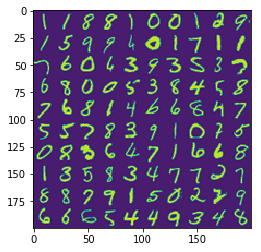

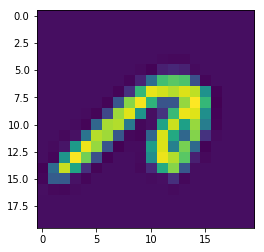

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
(5000, 401) (5000, 10)


In [10]:
X,y=load_data('../machine-learning-ex3/ex3/ex3data1.mat')
X=np.hstack((np.ones((y.size,1)),X))
Y=np.zeros((y.size,10))
nos=(y%10)[:,0]
for i in range(0,y.size):
    Y[i,nos[i]]=1
idx=3343
plt.imshow(X[idx][1:].reshape(20,20))
plt.show()
print(Y[idx])
print(X.shape,Y.shape)

In [11]:
input_layer_size  = 400
hidden_layer_size = 25
num_labels = 10

w=sio.loadmat('../machine-learning-ex3/ex3/ex3weights.mat')
Theta1,Theta2=w['Theta1'],w['Theta2']
print(Theta1.shape,Theta2.shape)

(25, 401) (10, 26)


In [12]:
def predict(t1,t2,x):
    a1=x
    a2=hyp(t1.T,a1)
    a3=hyp(t2.T,np.hstack((np.ones((x.shape[0],1)),a2)))
    return a3

In [13]:
p=predict(Theta1,Theta2,X)
print('Accuracy : ',100*np.sum(((np.argmax(p,axis=1)+1)%10)==np.argmax(Y,axis=1))/Y.shape[0])

Accuracy :  97.52
